Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset with the pandas.

In [ ]:
df = pd.read_csv('/content/Housing.csv')

Checking the dataframe(DF)

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Checking null values.

In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Outlier Detection Using IQR.

In [ ]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Example: Detect outliers in the 'price' column
outliers = detect_outliers(df, 'price')
print(outliers)

# Option 1: Remove outliers
df = df[~df.index.isin(outliers.index)]

       price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0   13300000   7420         4          2        3      yes        no       no   
1   12250000   8960         4          4        4      yes        no       no   
2   12250000   9960         3          2        2      yes        no      yes   
3   12215000   7500         4          2        2      yes        no      yes   
4   11410000   7420         4          1        2      yes       yes      yes   
5   10850000   7500         3          3        1      yes        no      yes   
6   10150000   8580         4          3        4      yes        no       no   
7   10150000  16200         5          3        2      yes        no       no   
8    9870000   8100         4          1        2      yes       yes      yes   
9    9800000   5750         3          2        4      yes       yes       no   
10   9800000  13200         3          1        2      yes        no      yes   
11   9681000   6000         

In [ ]:
cont = []
cat = []
for i in df.columns:
  if df[i].dtype == 'int64' or df[i].dtype == 'float64':
    cont.append(i)
  else:
    cat.append(i)

print("Continuous Variables:", cont)
print("Categorical Variables:", cat)

Continuous Variables: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical Variables: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


**Data Exploration and cleaning**


Statistical Summaries

In [ ]:

df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.300000e+02,530.000000,530.000000,530.000000,530.000000,530.000000
mean,4.600663e+06,5061.518868,2.943396,1.260377,1.788679,0.664151
std,1.596119e+06,2075.449479,0.730515,0.464359,0.861190,0.843320
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3547.500000,2.000000,1.000000,1.000000,0.000000
50%,4.270000e+06,4500.000000,3.000000,1.000000,2.000000,0.000000
75%,5.600000e+06,6315.750000,3.000000,1.000000,2.000000,1.000000
max,9.100000e+06,15600.000000,6.000000,3.000000,4.000000,3.000000


**Histograms for each feature to visualize their distributions to identify skewness, outliers, and the general shape of the distribution.**

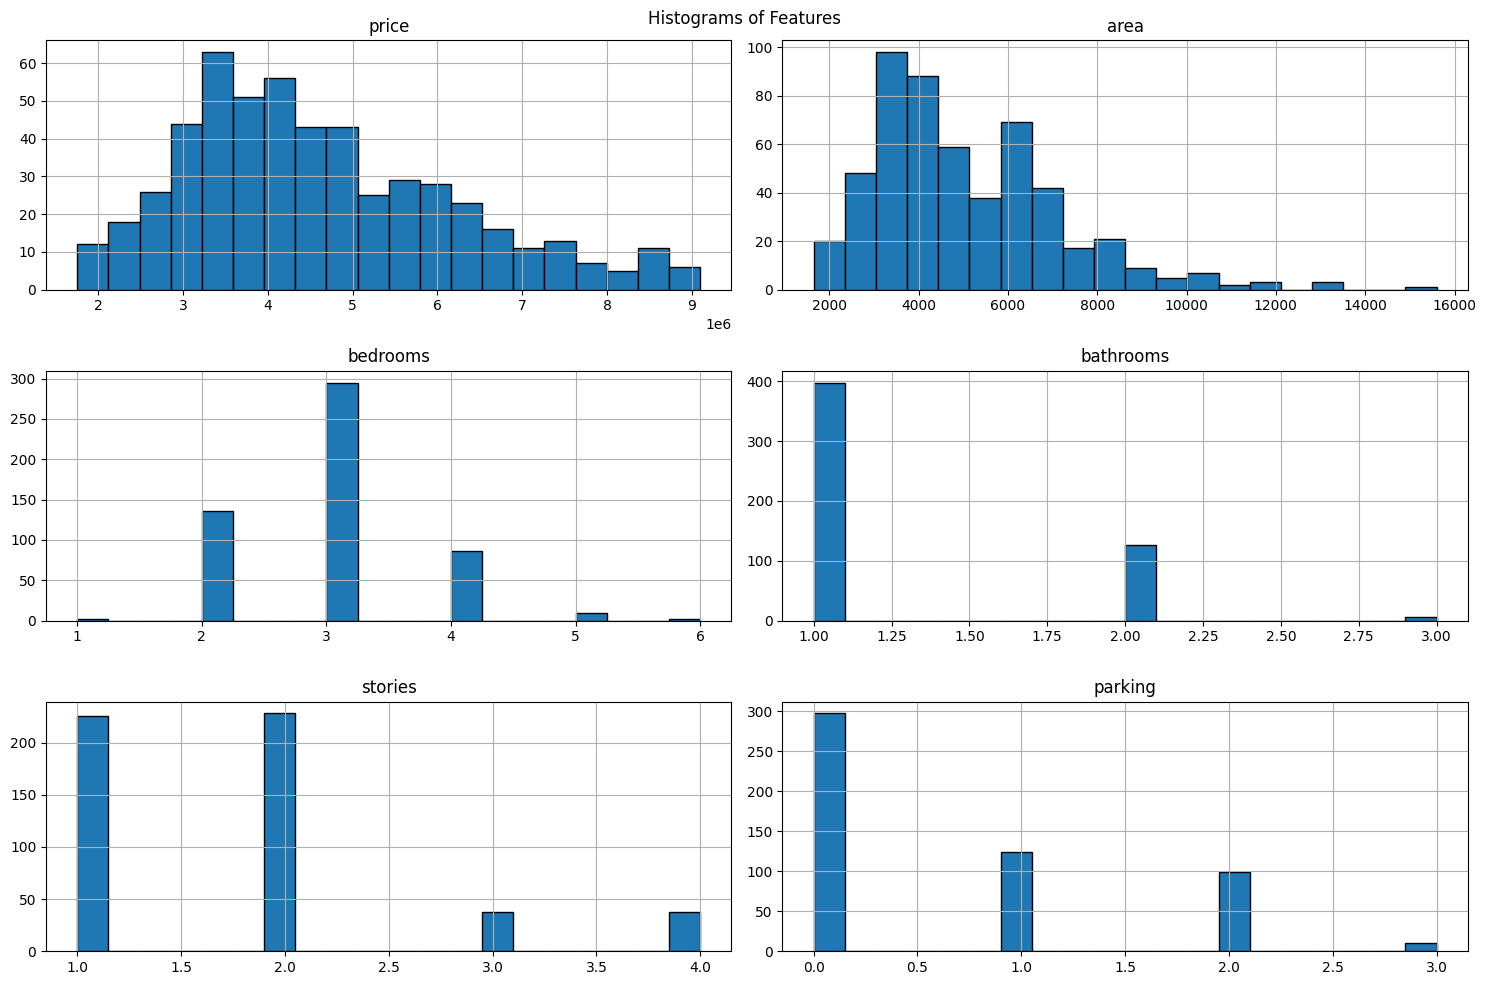

In [ ]:
df.hist(figsize=(15,10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Features')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

Normalizing the data to visualize data on same scale.

In [ ]:

from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Normalize each numeric column separately
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Save normalized data to a new file (optional)
df.to_csv('/content/Housing.csv', index=False)

# Output the first few rows of the normalized dataset
df.head()


<ipython-input-10-633703c325f6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,1.000000,0.311828,0.6,0.0,0.333333,yes,no,yes,no,no,0.666667,no,semi-furnished
16,1.000000,0.354839,0.6,0.5,0.333333,yes,yes,yes,no,yes,0.333333,yes,unfurnished
17,0.980952,0.491039,0.4,0.5,1.000000,yes,no,no,no,yes,0.666667,no,furnished
18,0.971429,0.211470,0.4,0.5,0.333333,yes,yes,no,no,yes,0.666667,no,furnished
19,0.966667,0.341935,0.4,0.5,0.333333,yes,no,no,no,yes,0.333333,yes,semi-furnished


Box plot to visualize their distribution and detect any outliers.

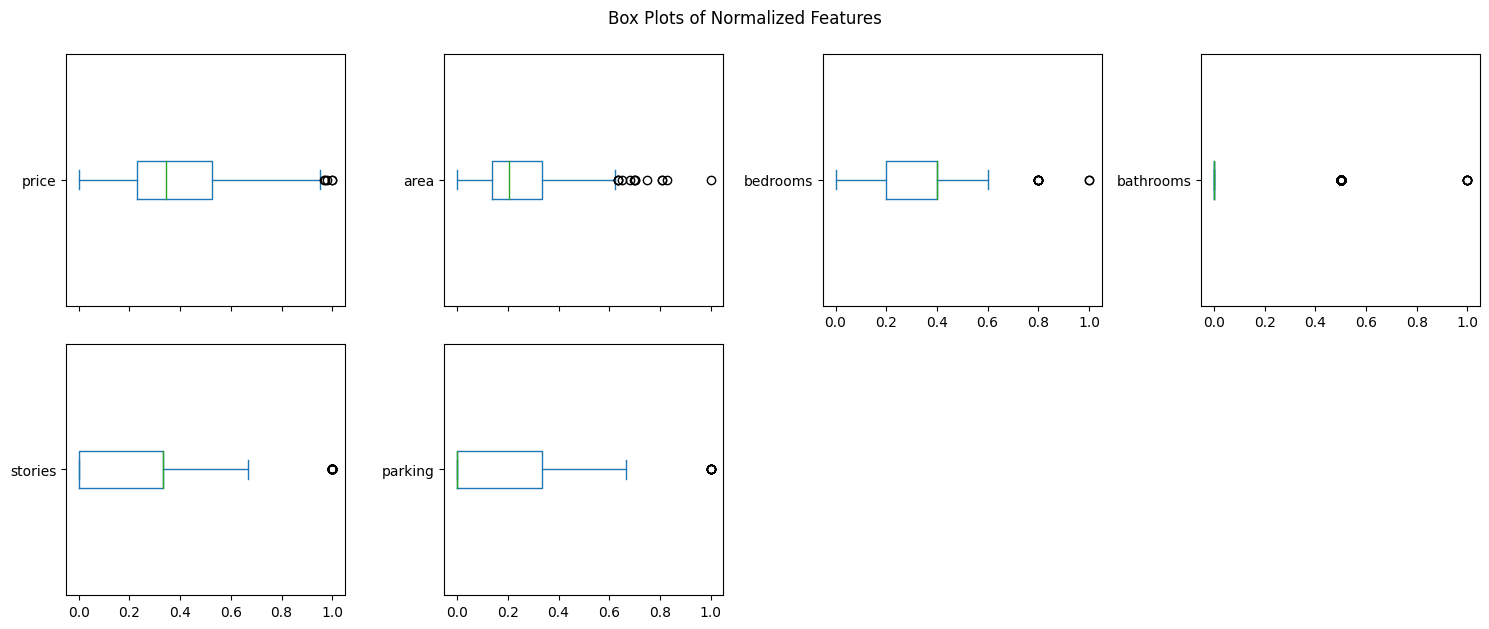

In [ ]:
df.plot(kind='box', subplots=True, layout=(5, 4), figsize=(15, 15), vert=False)
plt.suptitle('Box Plots of Normalized Features')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

Handling Categorical Data and Calculate Correlation Matrix

Interpretation of a Heatmap for a Correlation Matrix

<ipython-input-12-0d1ff1b76ea2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].map(binary_mapping)
<ipython-input-12-0d1ff1b76ea2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].map(binary_mapping)
<ipython-input-12-0d1ff1b76ea2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

                                    price      area  bedrooms  bathrooms  \
price                            1.000000  0.509856  0.332293   0.457962   
area                             0.509856  1.000000  0.112056   0.133472   
bedrooms                         0.332293  0.112056  1.000000   0.350025   
bathrooms                        0.457962  0.133472  0.350025   1.000000   
stories                          0.432528  0.063939  0.404628   0.308026   
parking                          0.328308  0.344797  0.110234   0.127184   
mainroad_1                       0.310712  0.289321 -0.024639   0.023649   
guestroom_1                      0.290195  0.155552  0.076559   0.147393   
basement_1                       0.195705  0.037246  0.100002   0.120375   
hotwaterheating_1                0.082829  0.002533  0.029208   0.040149   
airconditioning_1                0.462342  0.211505  0.146859   0.174966   
prefarea_1                       0.292536  0.212723  0.066364   0.032021   
furnishingst

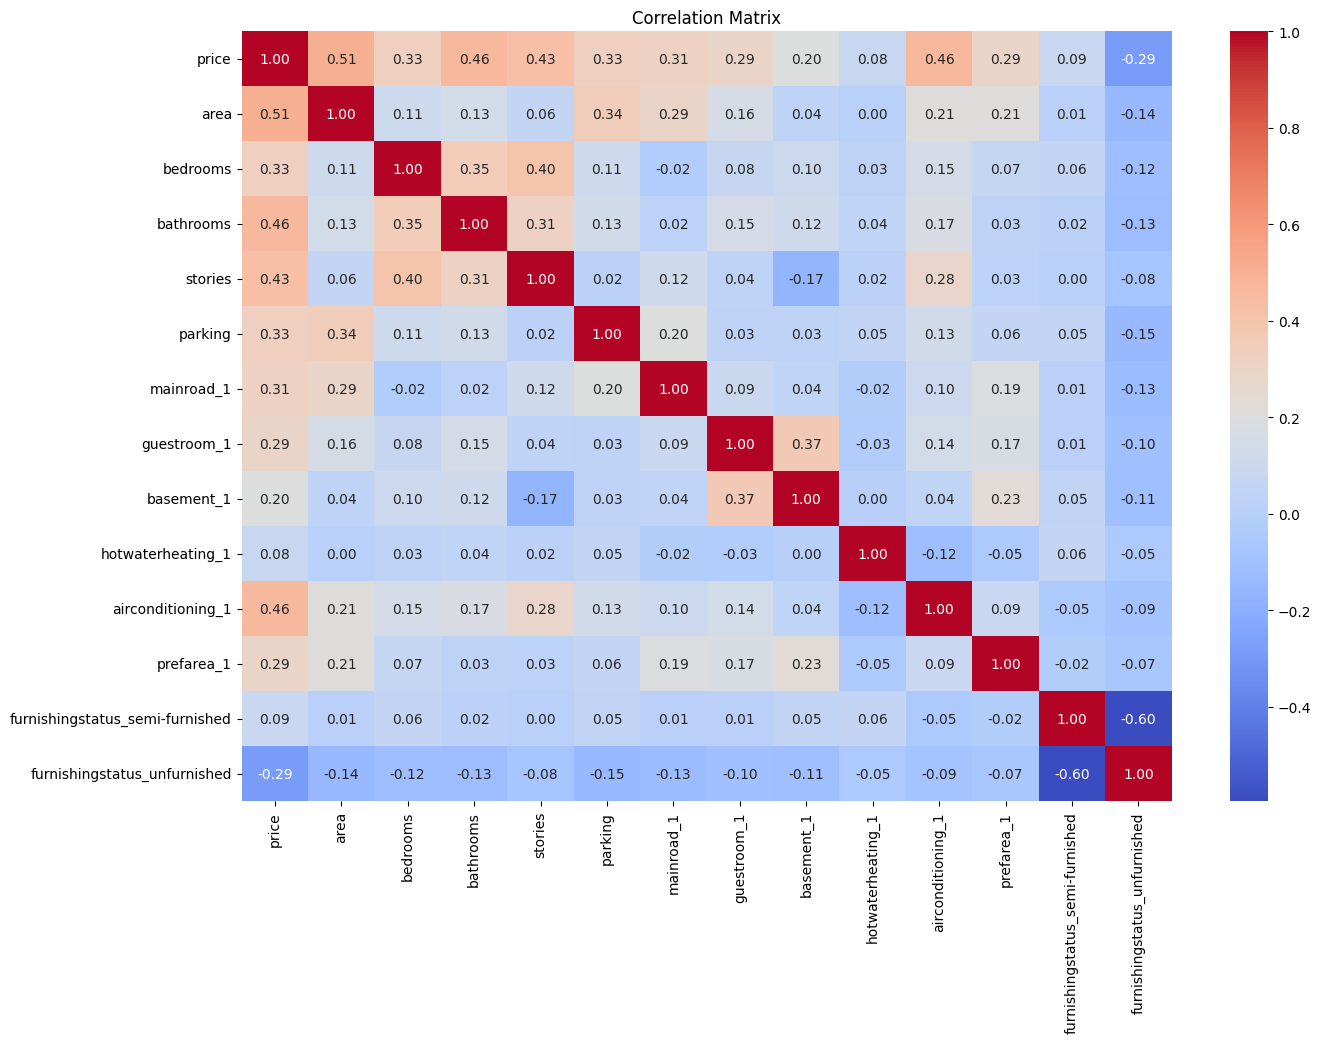

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Convert binary categorical columns ('yes'/'no') to numeric (1/0)
binary_mapping = {'yes': 1, 'no': 0}
for column in categorical_columns:
    if set(df[column].unique()) <= {'yes', 'no'}:
        df[column] = df[column].map(binary_mapping)

# For other categorical columns, use one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix
print(corr_matrix)

# Plotting the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Splitting the data and Training model.

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Convert binary categorical columns ('yes'/'no') to numeric (1/0)
binary_mapping = {'yes': 1, 'no': 0}
for column in categorical_columns:
    if set(df[column].unique()) <= {'yes', 'no'}:
        df[column] = df[column].map(binary_mapping)

# For other categorical columns, use one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define the target variable and features
X = df.drop(columns='price')  # Features
y = df['price']               # Target variable

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.021254172330042967
R-squared (R²): 0.6684003582833362


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 0.1067860223275501


Residual Analysis: Examining the residuals to assess model fit.

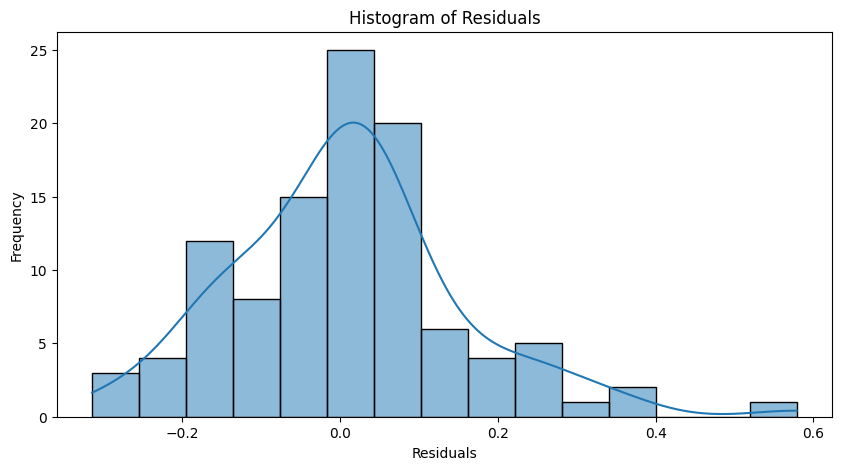

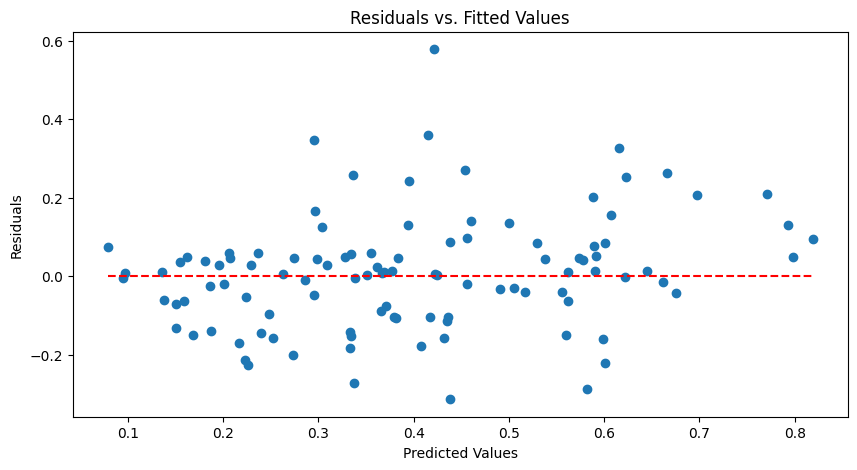

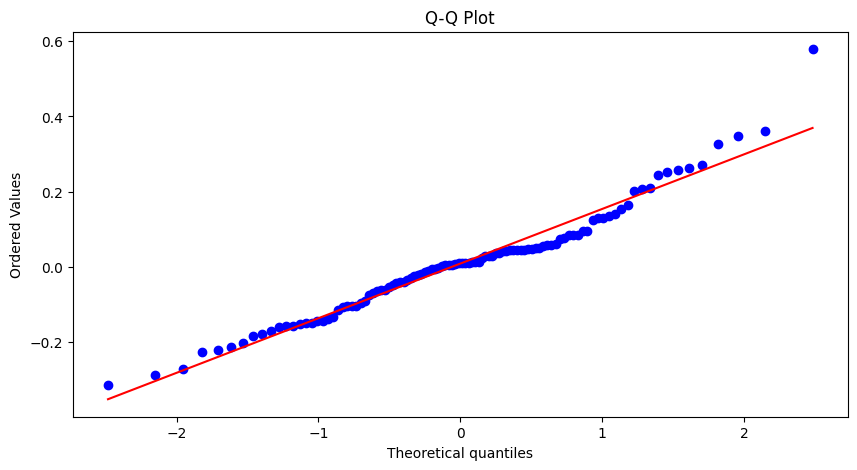

In [ ]:

import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred

# 1. Histogram of Residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 2. Residuals vs. Fitted Values Plot
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='dashed')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# 3. Q-Q Plot
plt.figure(figsize=(10, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


Linear regression by preparing the data, splitting it into training and testing sets, training the model, making predictions, calculating residuals, and visualizing results.

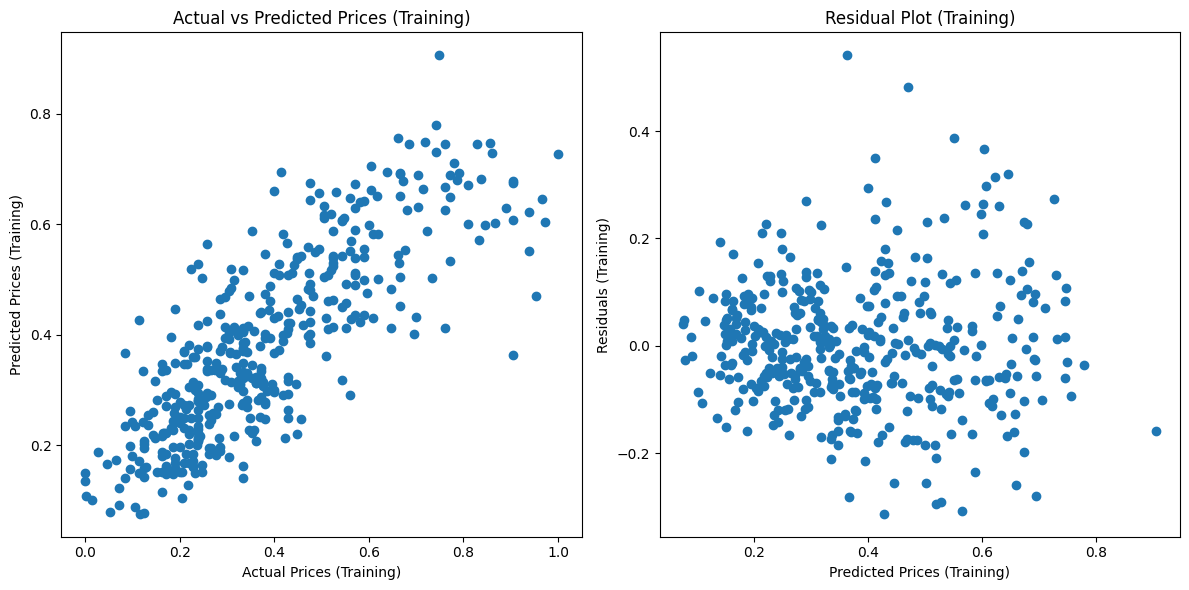

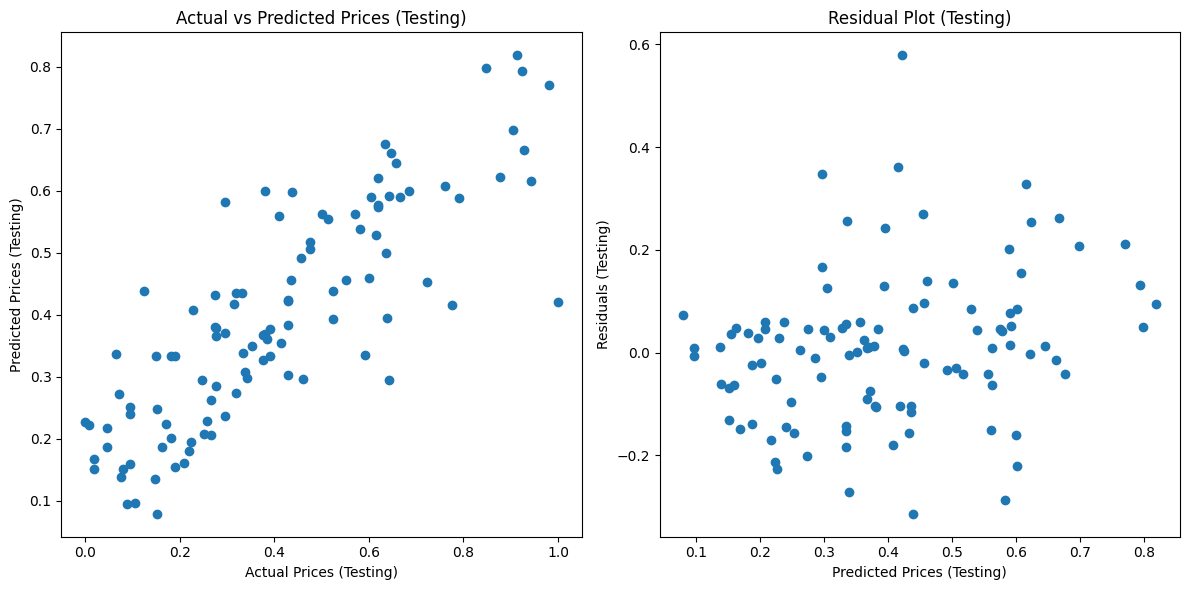

,Coefficient
area,0.379535
bedrooms,0.069105
bathrooms,0.220951
stories,0.168298
parking,0.069267
mainroad_1,0.055287
guestroom_1,0.051647
basement_1,0.043127
hotwaterheating_1,0.108772
airconditioning_1,0.103854


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # import pandas

# Assuming 'df' is the DataFrame you used earlier, replace 'housing_data' with 'df'
# Prepare the data
# Encoding categorical variables as dummy variables
housing_data_encoded = pd.get_dummies(df, drop_first=True) # Use 'df' here

# Features and target variable
X = housing_data_encoded.drop('price', axis=1)
y = housing_data_encoded['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Scatter plot of actual vs predicted values (training set)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual Prices (Training)')
plt.ylabel('Predicted Prices (Training)')
plt.title('Actual vs Predicted Prices (Training)')

# Residual plot (training set)
plt.subplot(1, 2, 2)
plt.scatter(y_train_pred, train_residuals)
plt.xlabel('Predicted Prices (Training)')
plt.ylabel('Residuals (Training)')
plt.title('Residual Plot (Training)')

plt.tight_layout()
plt.show()

# Scatter plot of actual vs predicted values (testing set)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Prices (Testing)')
plt.ylabel('Predicted Prices (Testing)')
plt.title('Actual vs Predicted Prices (Testing)')

# Residual plot (testing set)
plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, test_residuals)
plt.xlabel('Predicted Prices (Testing)')
plt.ylabel('Residuals (Testing)')
plt.title('Residual Plot (Testing)')

plt.tight_layout()
plt.show()

# Displaying the model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients